# 02. Regression homework

The goal is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

## 0.1 Prepare environment

In [190]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 0.2 Get Data

In [191]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-09 15:56:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.007s  

2025-10-09 15:56:51 (120 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



## 0.3 Preparing Data
Preparing the dataset. Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [192]:
df = pd.read_csv("car_fuel_efficiency.csv", header=0)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [193]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [194]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## 0.4 EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

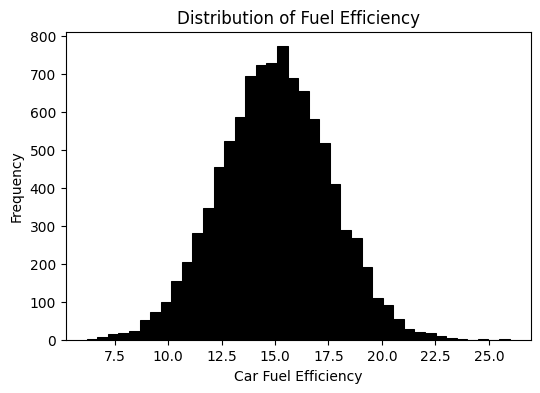

In [195]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Car Fuel Efficiency')
plt.title('Distribution of Fuel Efficiency')

plt.show()

## Question 1
There's one column with missing values. What is it?

In [196]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [197]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [198]:
median_points = df['horsepower'].median()
median_points

np.float64(149.0)

## Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [199]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [200]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

## Question 3 - filling with 0

In [201]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [202]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [203]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [204]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [205]:
# Training
X_train_fill0 = prepare_X(df_train)
w_0_fill0, w_fill0 = train_linear_regression(X_train_fill0, y_train)

In [206]:
y_train_pred_fill0 = w_0 + X_train_fill0.dot(w)

In [207]:
rmse_train_fill0 = rmse(y_train, y_train_pred_fill0)
rmse_train_fill0

np.float64(0.5203268212192156)

In [208]:
# Validating
X_val_fill0 = prepare_X(df_val)
y_val_pred_fill0 = w_0_fill0 + X_val_fill0.dot(w)

In [209]:
rmse_val_fill0 = rmse(y_val, y_val_pred_fill0)
score_fill_0 = round(rmse_val, 2)
score_fill_0

np.float64(0.51)

## Question 3 - filling with the mean

In [210]:
mean_train = df_train.horsepower.mean()
mean_train

np.float64(149.54476367006487)

In [211]:
def prepare_X_filling_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(mean_train)
    X = df_num.values
    return X

In [212]:
# Training
X_train_fill_mean = prepare_X_filling_mean(df_train)
w_0_fill_mean, w_fill_mean = train_linear_regression(X_train_fill_mean, y_train)

In [213]:
y_train_pred_fill_mean = w_0 + X_train_fill_mean.dot(w)

In [214]:
rmse_train_fill_mean = rmse(y_train, y_train_pred_fill_mean)
rmse_train_fill_mean

np.float64(0.5024552624906132)

In [215]:
# Validating
X_val_fill_mean = prepare_X(df_val)
y_val_pred_fill_mean = w_0_fill_mean + X_val_fill_mean.dot(w)

In [216]:
rmse_val_fill_mean = rmse(y_val, y_val_pred_fill_mean)
score_fill_mean = round(rmse_val, 2)
score_fill_mean

np.float64(0.51)

## Question 4
Train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

In [217]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [218]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

     0 0.52
  0.01 0.52
   0.1 0.52
     1 0.52
     5 0.52
    10 0.52
   100 0.52


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [219]:
def splitting(df, seed):
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    return [df_train, df_val, df_test]

In [220]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [221]:
def get_y(df):
    y = df.fuel_efficiency_mpg.values
    del df['fuel_efficiency_mpg']
    return y

In [222]:
def delete_y(df):
    del df['fuel_efficiency_mpg']
    return df

In [223]:
def train(df_train, y_train):
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    return w_0, w 


In [224]:
'''
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
DF_train = []
DF_val = []
DF_test = []
Y_train = []
Y_val = []
Y_test = []
Train = []
y_val_pred

for seed in seeds:
    split = splitting(df, seed)
    DF_train.append(split[0])
    DF_val.append(split[1])
    DF_test.append(split[2])
    Y_train.append(split[0].fuel_efficiency_mpg.values)
    Y_val.append(split[1].fuel_efficiency_mpg.values)
    Y_test.append(split[2].fuel_efficiency_mpg.values)
    Train.append(train(split[0], split[0].fuel_efficiency_mpg.values))
    y_val_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_val_pred)
'''

'\nseeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]\nDF_train = []\nDF_val = []\nDF_test = []\nY_train = []\nY_val = []\nY_test = []\nTrain = []\ny_val_pred\n\nfor seed in seeds:\n    split = splitting(df, seed)\n    DF_train.append(split[0])\n    DF_val.append(split[1])\n    DF_test.append(split[2])\n    Y_train.append(split[0].fuel_efficiency_mpg.values)\n    Y_val.append(split[1].fuel_efficiency_mpg.values)\n    Y_test.append(split[2].fuel_efficiency_mpg.values)\n    Train.append(train(split[0], split[0].fuel_efficiency_mpg.values))\n    y_val_pred = w_0 + X_val.dot(w)\n    rmse_val = rmse(y_val, y_val_pred)\n'

In [225]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Rmse_val = []

for seed in seeds:
    split = splitting(df, seed)
    y_train = get_y(split[0])
    w_0, w = train(split[0], y_train)
    y_val = get_y(split[1])
    X_val= prepare_X(split[1])
    y_val_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_val_pred)
    print('seed', seed,':', rmse_val)
    Rmse_val.append(rmse_val)

seed 0 : 0.5206531296292951
seed 1 : 0.5213388912860217
seed 2 : 0.5228069974785726
seed 3 : 0.5159516741108942
seed 4 : 0.5109129460108117
seed 5 : 0.5283406460133415
seed 6 : 0.5313910658151165
seed 7 : 0.5090670387365963
seed 8 : 0.5147399129426932
seed 9 : 0.5131865908408015


In [226]:
std = np.std(Rmse_val)
std_rounded = round(std, 3)
std_rounded

np.float64(0.007)

## Question 6
Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [227]:
split = splitting(df, 9)
df_train = split[0]
df_val = split[1]
df_test = split[2]

In [228]:
df_train_full = pd.concat([df_train, df_val])

In [229]:
y_train_full = get_y(df_train_full)

In [230]:
X_train_full = prepare_X(df_train_full)

In [231]:
w_0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)
y_pred = w_0 + X_val.dot(w)

In [232]:
print(round(rmse(y_val, y_pred), 3))

0.513
